<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/cifar10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [5]:
print(X_test.shape,y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [6]:
import matplotlib.pyplot as plt

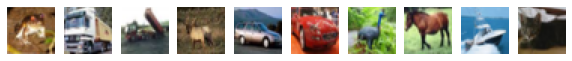

In [7]:
fig, ax = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
  ax[i].imshow(X_train[i])
  ax[i].axis('off')
plt.show()

In [8]:
print([y_train[i] for i in range(10)])

[array([6], dtype=uint8), array([9], dtype=uint8), array([9], dtype=uint8), array([4], dtype=uint8), array([1], dtype=uint8), array([1], dtype=uint8), array([2], dtype=uint8), array([7], dtype=uint8), array([8], dtype=uint8), array([3], dtype=uint8)]


airplane - 0										
automobile - 1										
bird - 2										
cat - 3										
deer - 4										
dog - 5										
frog - 6										
horse - 7										
ship - 8										
truck - 9

In [9]:
import numpy as np

In [10]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 90, width_shift_range = 0.1,height_shift_range = 0.1, horizontal_flip = True)

datagen.fit(X_train)
# 데이터가 부족할 때 데이터를 여러 방면으로 돌려 데이터의 크기를 늘려주는 함수

In [12]:
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils

In [13]:
ss = StandardScaler()

In [14]:
X_train =  X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = ss.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = ss.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Dense,BatchNormalization,Flatten
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu',input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.01))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.01))

model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer=regularizers.L2(0.01),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.01))

model.add(Flatten())
model.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1563/1563 [==============================] - 43s 7ms/step - loss: 2.9219 - accuracy: 0.5487 - val_loss: 1.6714 - val_accuracy: 0.6384
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5356 - accuracy: 0.6595 - val_loss: 1.7812 - val_accuracy: 0.5616
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4222 - accuracy: 0.6870 - val_loss: 1.5068 - val_accuracy: 0.6592
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3793 - accuracy: 0.7036 - val_loss: 1.3727 - val_accuracy: 0.7111
Epoch 5/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3348 - accuracy: 0.7153 - val_loss: 1.4146 - val_accuracy: 0.6861
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2884 - accuracy: 0.7238 - val_loss: 1.3139 - val_accuracy: 0.7117
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2478 - accuracy: 0.7295 - val_loss: 1.3601 -

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0074 - accuracy: 0.7628


[1.007449984550476, 0.7627999782562256]

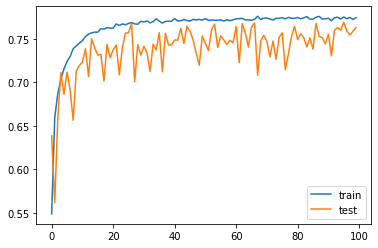

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()

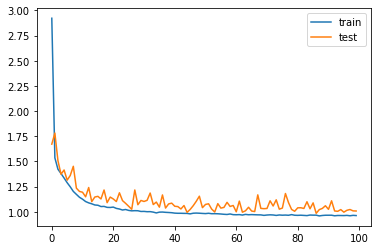

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 고양이 / 정답: 고양이


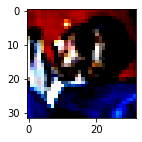

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 배


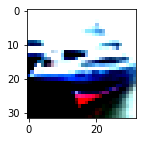

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 배


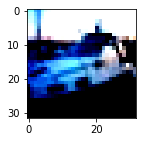

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 배 / 정답: 비행기


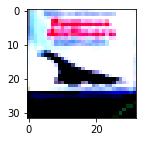

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 개구리 / 정답: 개구리


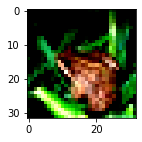

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 개구리 / 정답: 개구리


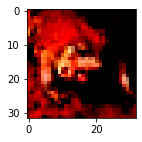

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 자동차 / 정답: 자동차


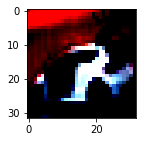

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 사슴 / 정답: 개구리


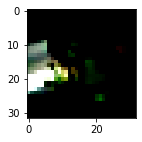

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 고양이 / 정답: 고양이


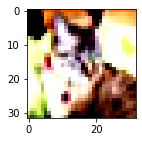

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


예측: 자동차 / 정답: 자동차


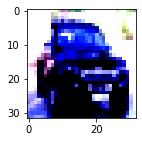

In [21]:
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
plt.rcParams["figure.figsize"] = (2,2)
for i in range(10):
  output = model.predict(X_test[i].reshape(1,32,32,3))
  
  plt.imshow(X_test[i].reshape(32,32,3))
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()